In [1]:
import numpy as np
import pandas as pd
import torch
from torch import nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

# Basic Operations 
Deep Lizard

In [2]:
t = torch.tensor([[1,2],[3,4]])
t

tensor([[1, 2],
        [3, 4]])

In [3]:
t.shape

torch.Size([2, 2])

In [4]:
rank = len(t.shape) # len of shape = Rank
rank

2

In [5]:
print(t.device)
print(type(t))
print(t.type())
print(t.dtype)
print(t.layout)

cpu
<class 'torch.Tensor'>
torch.LongTensor
torch.int64
torch.strided


You can change the device to CUDA if you have GPU enabled

In [6]:
device = torch.device('cuda:0')
device

device(type='cuda', index=0)

## Operations on Tensors are done IFF they are on same device only and IFF they have same dType (version > 1.3.0 can perform operations on float and int)

In [7]:
t1 = torch.tensor([[1,2],[2,3]])
t2 = torch.tensor([[1.1,2.2],[2.2,3.3]])
# t3 = t1.cuda() # No CUDA Present

In [8]:
print(t1.dtype)
print(t2.dtype)

torch.int64
torch.float32


In [9]:
t1+t2

tensor([[2.1000, 4.2000],
        [4.2000, 6.3000]])

## Create tensors from array or `data` and their differences

In [10]:
data = np.array([1,2,3])
type(data)

numpy.ndarray

In [11]:
t1 = torch.Tensor(data)  # Constructor
# equivalent to t = torch.tensor(data,dtype=torch.float32)


print(t1)
print(type(t1))
print(t1.type())
print(t1.dtype)


tensor([1., 2., 3.])
<class 'torch.Tensor'>
torch.FloatTensor
torch.float32


In [12]:
t2 = torch.tensor(data) # Factory Function 
#  equivalent to t = torch.tensor(data,dtype=torch.int64)


print(t2)
print(type(t2))
print(t2.type())
print(t2.dtype)

tensor([1, 2, 3])
<class 'torch.Tensor'>
torch.LongTensor
torch.int64


In [13]:
t3 = torch.from_numpy(data) # Factory Function

print(t3)
print(type(t3))
print(t3.type())
print(t3.dtype)


tensor([1, 2, 3])
<class 'torch.Tensor'>
torch.LongTensor
torch.int64


In [14]:
t4 = torch.as_tensor(data) # Factory Function

print(t4)
print(type(t4))
print(t4.type())
print(t4.dtype)


tensor([1, 2, 3])
<class 'torch.Tensor'>
torch.LongTensor
torch.int64


### Modify values of `data` now

In [15]:
data[0] = 5
data[2] = 7

In [16]:
print(t1)
print(t2)
print(t3)
print(t4)

tensor([1., 2., 3.])
tensor([1, 2, 3])
tensor([5, 2, 7])
tensor([5, 2, 7])


SEE the DIFFERENCE? First 2 use `COPY` of data. Last 2 `SHARE` the same instances

### Reshaping, stacking, Flattening

In [17]:
# each value represents a pixel of 4*4 image
one = torch.tensor([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]).reshape(4,4)  # converts into a 4*4 matrix
two = torch.tensor([2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]).reshape(4,4)
three = torch.tensor([3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]).reshape(4,4) 
stacked = torch.stack((one,two,three)) # make a batch of 3 images so shape is (3,4,4)
stacked_reshaped = stacked.reshape((3,1,4,4)) # batch, color channels, height, width
stacked_reshaped_flattened = stacked_reshaped.flatten(start_dim=1) 
# leave te batch but flatten all the pixels
stacked_reshaped_flattened

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]])

In [18]:
another_method = stacked_reshaped.reshape((3,16)) # Flatten each image
another_method

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]])

### Tensor broadcasting
Tensor works only and only on  `Element vise` operations

In [19]:
print(t1*(3))
print(t1.mul(3))
# it is not scaler multiplication but the scaler is broadcasted

tensor([3., 6., 9.])
tensor([3., 6., 9.])


In [20]:
# To get the idea, it is like copying a scaler to same dimension and then checking every element
# of one tensor to every element of second on the same index
t1%2 == 0 

tensor([False,  True, False])

In [21]:
# It is just like making an tensor of same shape as of given tensor but with all the scaler values
broadcasted_3 = torch.from_numpy(np.broadcast_to(3,t1.shape))
print(f'Broadcasted tensor: {broadcasted_3}')
print(t1*broadcasted_3)
print(t1.mul(broadcasted_3))

Broadcasted tensor: tensor([3, 3, 3])
tensor([3., 6., 9.])
tensor([3., 6., 9.])


# Torchvision Datasets

In [22]:
train_set = torchvision.datasets.FashionMNIST(download=True,root='./Data/FashionMNIST',
                                              transform=transforms.Compose([transforms.ToTensor()]))

train_loader = torch.utils.data.DataLoader(train_set,batch_size=32)

In [23]:
len(train_set.targets)

60000

In [24]:
train_set.targets.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [25]:
sample = next(iter(train_set))
print(type(sample))
print(len(sample))
# first entry sample[0] are the pixels and second is the label
pixels,label = sample
print(pixels.shape)

<class 'tuple'>
2
torch.Size([1, 28, 28])


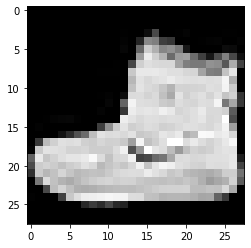

In [26]:
plt.imshow(pixels.reshape(28,28),cmap='gray')
# plt.imshow(pixels.squeeze())

In [27]:
batch = next(iter(train_loader))
print(len(batch))
print(type(batch))

2
<class 'list'>


In [28]:
images,labels = batch
print(len(images),len(labels))
print(type(images))
print(images.shape)

32 32
<class 'torch.Tensor'>
torch.Size([32, 1, 28, 28])


tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8,
        4, 3, 0, 2, 4, 4, 5, 3])


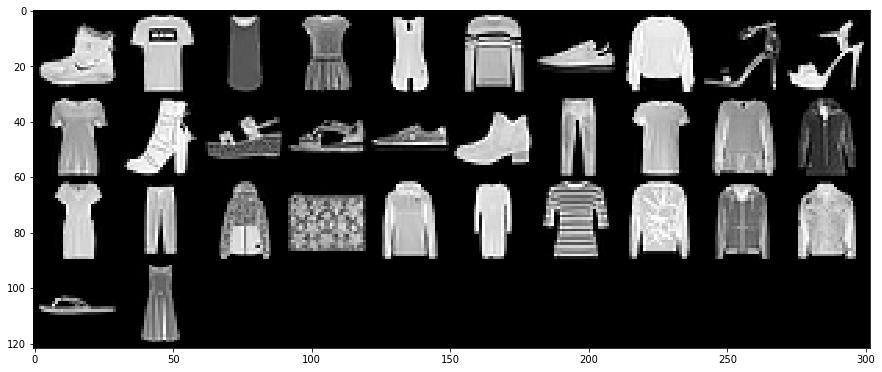

In [29]:
grid = torchvision.utils.make_grid(images,nrow=10) #nrow is number of elements in a single row
plt.figure(figsize=(15,12))
plt.imshow(np.transpose(grid,(1,2,0))) # transpose to (h,w,c) instead of (c,h,w)
print(labels)

# CNN Architecture

In [30]:
class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__()
        self.conv_1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=(5,5),bias=True)
        # for single grayscale image use 6 different kernls of size (5,5) to produce 6 diff feature maps 
        
        self.conv_2 = nn.Conv2d(in_channels=6,out_channels=12,kernel_size=(3,3))
        # 6 already feat maps, use 12 different kernal filters of size (3,3) to get TOTAL of 12 new feat
        
        self.dense_1 = nn.Linear(in_features=12*4*4,out_features=128) # WHYY (12*4*4)
        # Flatten the output of conv_2d in 12*4*4
        
        self.fc_2 = nn.Linear(in_features=128,out_features=64)
        # Fully Connected = fc_2 = Dense Layer = dense_2
        
        self.out = nn.Linear(in_features=64,out_features=10)
        # output layer. Output number of neurons = num of classes for classification & 1 for regression
        
    
    def forward(self,t):
        '''
        implement a forward pass on a Tensor 't' of rank 'R'
        '''
        # input  layer 1 though it is nevr needed
        t = t
        
        # second layer. Layer is a mix of functions that has weights 
        t = self.conv_1(t) # works by calling __call__() method inside class
        t = F.relu(input=t,) # it is not a leyer but Function as layers have weights
        t = F.max_pool2d(t,kernel_size=(3,3),stride=2) # max pool
        
        # third layer
        t = self.conv_2(t) # works by calling __call__() method inside class
        t = F.relu(input=t,) # it is not a leyer but Function as layers have weights
        t = F.max_pool2d(t,kernel_size=(3,3),stride=2) # max pool
        
        # fourth layer
        t = t.reshape(-1,12*4*4) 
        # due to Conv and pooling operations, our image has been reduced from (1,28,28) to (4,4)
        t = self.dense_1(t)
        t = F.relu(t)
        
        # Fifth layer
        t = self.fc_2(t)
        t = F.relu(t)
        
        # output
        t = self.out(t)
        # t = F.softmax(t,dim=1) # why is dim=1?
        # commented because loss function used will be cross_entropy which has softmax behind the scenes
        
        
        return t

In [31]:
network = Network() # instantiate object of Nwtwork

In [32]:
torch.set_grad_enabled(False) # stop making computational graphs

### Input should be always `(BATCH,CHANNELS,HEIGHT,WIDTH)` for Convolution Networks

In [33]:
sample = next(iter(train_set))
image, label = sample
image.shape # add a new index to the the image to convert it into a batch of 1

torch.Size([1, 28, 28])

In [34]:
batch_image = image.reshape((1,1,28,28))
print(batch_image.shape)

# or by using 

batch_image = image.unsqueeze(dim=0)
print(batch_image.shape)

torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])


In [35]:
y_pred = network(batch_image) 
y_pred # y_pred is NOT the  probabilities for each label. These are final output Tensor because
# we have not used softmax

tensor([[ 0.0897,  0.0300,  0.0606,  0.0675, -0.0154,  0.0011,  0.0774, -0.0797,
          0.0684, -0.0604]])

In [36]:
F.softmax(y_pred,dim=1) # these are the probabilities for each class

tensor([[0.1066, 0.1004, 0.1036, 0.1043, 0.0960, 0.0976, 0.1053, 0.0900, 0.1044,
         0.0918]])

In [37]:
y_pred.shape # shape is (1,10) means 1 image and 10 predictions

torch.Size([1, 10])

In [38]:
y_pred.argmax(dim=1) # get the index where value is maximum

tensor([0])

# Load Batch

In [39]:
train_set = torchvision.datasets.FashionMNIST(download=True,root='./Data/FashionMNIST',
                                              transform=transforms.Compose([transforms.ToTensor()]))

train_loader = torch.utils.data.DataLoader(train_set,batch_size=32) 

In [40]:
batch = next(iter(train_loader)) # make a new batch from DataLoader
images,labels = batch # get images and labels from batch

In [41]:
print(len(labels)) # 32 labels for 32 images
print(images.shape) # 32 grayscale images of size (28,28)

32
torch.Size([32, 1, 28, 28])


In [42]:
network = Network() # weights are random everytime you initialize
pred = network(images)
pred.shape # 10 labels for each of 32 images

torch.Size([32, 10])

In [44]:
pred.argmax(dim=1)

tensor([3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3, 0,
        0, 3, 3, 3, 0, 0, 3, 0])

In [45]:
labels

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8,
        4, 3, 0, 2, 4, 4, 5, 3])

In [46]:
pred.argmax(dim=1).eq(labels) # element wise operation. Return True if equal else return False

tensor([False, False,  True,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
         True, False, False, False, False,  True, False, False, False, False,
        False, False])

In [54]:
def get_correct_pred(pred,labels,percent=False):
    num = pred.argmax(dim=1).eq(labels).sum().item()
    if percent:
        return (num/len(labels))*100 # 4 out of 32 correct predictions
    else:
        return num

In [56]:
print(f'{get_correct_pred(pred,labels,True)}% of labels are predicted correctly

12.5

In [49]:
len(labels)

32

# First Feed Forward DNN
Tutorials Point

In [ ]:
IN,OUT,HID= 10,5,1
BATCH_SIZE = 32

In [ ]:
X_train = torch.randn(BATCH_SIZE,IN)
y_train = torch.tensor([[1.0], [0.0], [0.0], [1.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0]])

In [ ]:
model = nn.Sequential(nn.Linear(IN,HID), nn.ReLU(),
                      nn.Linear(HID,HID),nn.ReLU(),
                      nn.Linear(HID,OUT),nn.Sigmoid())

In [ ]:
loss_fun = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)

In [ ]:
for epoch in range(5):
    y_pred = model(X_train)
    
    loss = loss_fun(y_pred,y_train)
    
    print(f"At the endo of epoch: {epoch}, loss is:{loss.item()}")
     
    optimizer.zero_grad()  # set gradients to zero and update weights
    
    loss_fun.backward() # back propagation
    
    optimizer.step() # update the parameters for the next step
    
    

In [ ]:
! git commit -m "batch loader" "PyTorch.ipynb"